In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x_train = np.array([13, 11, 10.5, 9, 8.74, 10.4, 9.1, 6.25, 15, 10.9, 8.8, 4]).reshape(-1, 1)
y_train = np.array([20.9, 27.4, 29.7, 34.2, 30.1, 29.6, 41.7, 21.8, 28.1, 42, 32.2, 53.8])

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [9]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

32.5**2 * RBF(length_scale=0.25)

In [11]:
X = np.linspace(start=0, stop=17, num=1000).reshape(-1, 1)
print(len(X))

1000


In [12]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

Text(0, 0.5, '$f(x)$')

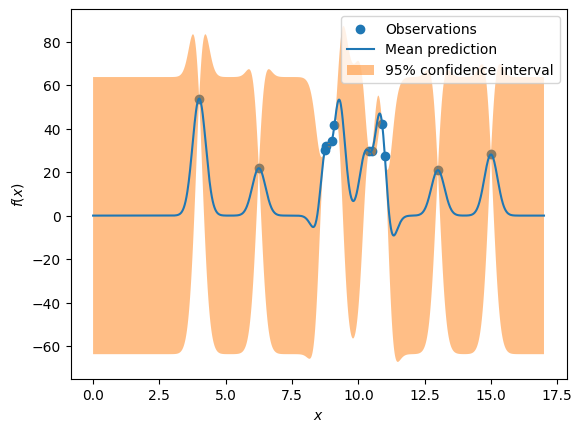

In [14]:
plt.scatter(x_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")